### Import Necessary Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Using TensorFlow backend.


### Read in Train and Test Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()
#test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Manipulate the Data

Pixel data becomes an array along with removing the labels from each column

In [3]:
X_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

print(X_train)

print(y_train)

print(X_test)

#X_train = X_train.reshape(X_train.shape[0],28,28)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 0 1 ... 7 6 9]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Standardize the Data

Create a method to standardize, will be used later.

In [4]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

### Create a Linear Model

Use softmax activation function on the one layer present in the linear model. Then, to test classification accuracy, we set our loss function to sparse categorical crossentropy and calculated the accuracy on both a train and validation set.

In [5]:
np.random.seed(45)

In [6]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'],
             )

2022-02-28 19:03:08.515723: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-28 19:03:08.516180: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [7]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(generator=batches, steps_per_epoch=100, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/10
100/100 [==============================] - 18s 181ms/step - loss: 0.9562 - accuracy: 0.6997 - val_loss: 0.5887 - val_accuracy: 0.8529
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 0.4566 - accuracy: 0.8664 - val_loss: 0.4618 - val_accuracy: 0.8762
Epoch 3/10
100/100 [==============================] - 16s 164ms/step - loss: 0.3874 - accuracy: 0.8928 - val_loss: 0.4878 - val_accuracy: 0.8913
Epoch 4/10
100/100 [==============================] - 16s 165ms/step - loss: 0.3392 - accuracy: 0.9014 - val_loss: 0.1942 - val_accuracy: 0.8958
Epoch 5/10
100/100 [==============================] - 17s 168ms/step - loss: 0.3543 - accuracy: 0.8966 - val_loss: 0.3282 - val_accuracy: 0.8992
Epoch 6/10
100/100 [==============================] - 17s 172ms/step - loss: 0.3138 - accuracy: 0.9064 - val_loss: 0.2187 - val_accuracy: 0.9010
Epoch 7/10
100/100 [==============================] - 17s 166ms/step - loss: 0.3048 - accuracy: 0.9144 - val_loss: 0.3338 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'Validation Accuracy')

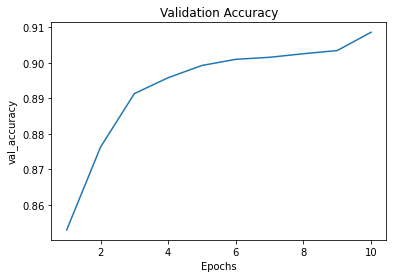

In [8]:
print(history.history.keys())

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.title('Validation Accuracy')

Accuracy gradually works its way up to just over 90% on the validation set, which seems pretty solid for such a simple neural network. Next we'll try adding in another layer to see if the added complexity assists with our accuracy reading.

### Fully Connected Model (2 layers)

In [9]:
model = Sequential([
    Lambda(standardize,input_shape=(28,28,1)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(generator=batches, steps_per_epoch=100, epochs=10, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/10
100/100 [==============================] - 24s 237ms/step - loss: 0.4430 - accuracy: 0.8650 - val_loss: 0.4693 - val_accuracy: 0.9045
Epoch 2/10
100/100 [==============================] - 23s 232ms/step - loss: 0.2568 - accuracy: 0.9244 - val_loss: 0.1833 - val_accuracy: 0.9415
Epoch 3/10
100/100 [==============================] - 24s 242ms/step - loss: 0.1843 - accuracy: 0.9422 - val_loss: 0.2444 - val_accuracy: 0.9482
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.1798 - accuracy: 0.9445 - val_loss: 0.1544 - val_accuracy: 0.9573
Epoch 5/10
100/100 [==============================] - 25s 253ms/step - loss: 0.0951 - accuracy: 0.9695 - val_loss: 0.1505 - val_accuracy: 0.9594
Epoch 6/10
100/100 [==============================] - 24s 239ms/step - loss: 0.1133 - accuracy: 0.9667 - val_loss: 0.0956 - val_accuracy: 0.9560
Epoch 7/10
100/100 [==============================] - 24s 236ms/step - loss: 0.1064 - accuracy: 0.9659 - val_loss: 0.0469 - val_ac

Text(0.5, 1.0, 'Validation Accuracy')

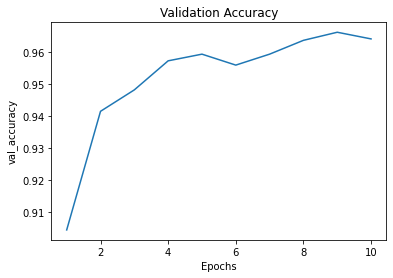

In [11]:
plt.plot(epochs, history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.title('Validation Accuracy')

# Predictions

### Linear Model

In [12]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'],
             )

model.fit(
    X_train,
    y_train,
    epochs = 5,
    validation_split = 0.0)

Epoch 1/5
26880/26880 [==============================] - 2s 69us/step - loss: 0.4612 - accuracy: 0.8611
Epoch 2/5
26880/26880 [==============================] - 2s 61us/step - loss: 0.3065 - accuracy: 0.9116
Epoch 3/5
26880/26880 [==============================] - 2s 62us/step - loss: 0.2856 - accuracy: 0.9175
Epoch 4/5
26880/26880 [==============================] - 2s 61us/step - loss: 0.2734 - accuracy: 0.9212
Epoch 5/5
26880/26880 [==============================] - 2s 61us/step - loss: 0.2643 - accuracy: 0.9243


In [13]:
prediction=model.predict_classes(X_test, batch_size = 64, verbose = 0)
pred_df = pd.DataFrame({'ImageId': range(1, len(prediction) + 1), 'Label': prediction})
pred_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


### 2-Layer Fully Connected Model

In [14]:
model = Sequential([
    Lambda(standardize,input_shape=(28,28,1)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(
    X_train,
    y_train,
    epochs = 5,
    validation_split=0)

Epoch 1/5
26880/26880 [==============================] - 8s 286us/step - loss: 0.2480 - accuracy: 0.9254
Epoch 2/5
26880/26880 [==============================] - 7s 267us/step - loss: 0.1092 - accuracy: 0.9655
Epoch 3/5
26880/26880 [==============================] - 8s 284us/step - loss: 0.0678 - accuracy: 0.9783
Epoch 4/5
26880/26880 [==============================] - 7s 275us/step - loss: 0.0504 - accuracy: 0.9842
Epoch 5/5
26880/26880 [==============================] - 8s 285us/step - loss: 0.0373 - accuracy: 0.9877


In [15]:
prediction2=model.predict_classes(X_test, batch_size = 64, verbose = 0)
pred_df2 = pd.DataFrame({'ImageId': range(1, len(prediction2) + 1), 'Label': prediction2})
pred_df2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [16]:
pred_df.to_csv('~/Desktop/submission1.csv',index=False)
pred_df2.to_csv('~/Desktop/submission2.csv',index=False)

